In [31]:
import pathlib
import datetime
import json
import pprint
from matplotlib import pyplot as plt

DATA_DIR = pathlib.Path('/home/michel/projects/desinfo/political-ads-scraper/data')

In [2]:
ads_by_date = {}

for filename in sorted(list((DATA_DIR / 'twitter').iterdir())):
    if filename.stem == 'graph_nb_ads_EU_twitter':
        continue

    fetch_datetime = datetime.datetime.strptime(
        filename.stem,
        'twitter-ads_EU_%Y-%m-%d_%H-%M-%S',
    )

    with open(filename, 'r') as f:
        ads = json.load(f)

    ads_by_date[fetch_datetime.strftime("%Y-%m-%d")] = ads


In [3]:
ads_by_date.keys()

dict_keys(['2019-06-07', '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27'])

In [4]:
ads_by_date['2019-06-10'].keys()

dict_keys(['advertisers_data', 'advertisers_tweets'])

In [6]:
print(ads_by_date['2019-06-10']['advertisers_tweets'].keys())

dict_keys(['191085626', '796432481289437184', '57043880', '28076891', '627200944', '93687642', '29958529', '19594736', '28322389', '19652551', '11836402', '18934165', '20399735', '549437864', '2367527478', '21100803', '19287037', '21440665', '22628924', '7599192', '281407388'])


In [11]:
tweet = ads_by_date['2019-06-10']['advertisers_tweets']['18934165'][3]

In [33]:
START_DATE = datetime.date(2019, 4, 25)
def date_to_index(date):
    return (date-START_DATE).days
def index_to_date(index):
    return START_DATE + datetime.timedelta(index)

In [35]:
amounts = [0]*90
dates = [
    START_DATE + datetime.timedelta(i)
    for i in range(0, 90)
]

for adv_id, adv_tweets in ads_by_date['2019-06-10']['advertisers_tweets'].items():
    for tweet in adv_tweets:
        try:
            total_spent = tweet['performance']['tweetPerformance']['totalSpend']
            start = datetime.datetime.fromtimestamp(tweet['metadata']['metadata'][0]['start_timestamp']).date()
            end = datetime.datetime.fromtimestamp(tweet['metadata']['metadata'][0]['end_timestamp']).date()
            
            start_index = date_to_index(start)
            end_index = date_to_index(end)+1
            spent_per_day = total_spent / (end_index-start_index)
            for i in range(start_index, end_index):
                amounts[i] += spent_per_day
        except TypeError:
            pass


No handles with labels found to put in legend.


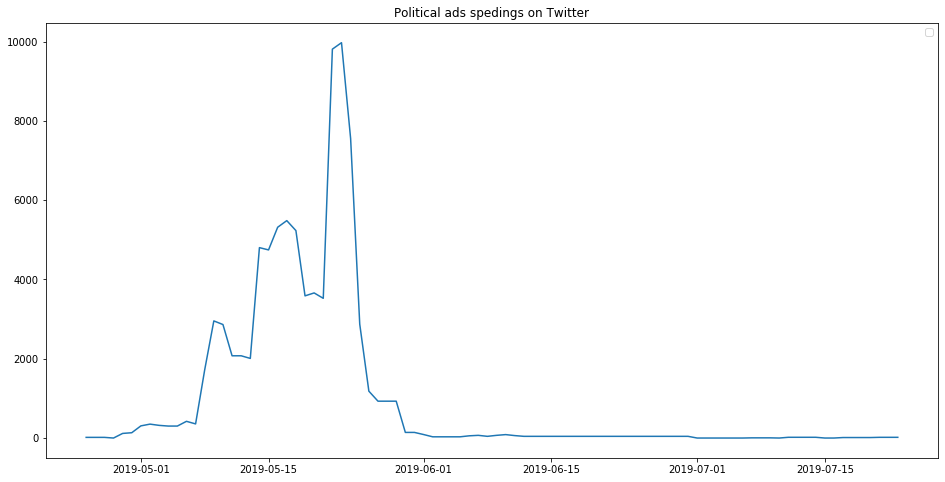

In [38]:

fig, ax = plt.subplots()
plt.plot(dates, amounts)
plt.title('Political ads spedings on Twitter')
ax.legend()
fig.set_size_inches(16, 8)
#plt.savefig('graph_facebook_ads_{}.png'.format(country_code), dpi=100)
